In [7]:
import numpy as np 
import string
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from collections import Counter
coeff = np.array([1,2,5,10,20])

In [8]:
class Hangman(object):
    def __init__(self):
        full_dictionary_location = "dictionaries/words_250000_train.txt"
        self.full_dictionary = self.build_dictionary(full_dictionary_location)

        self.guessed_letters = np.zeros(26, dtype=bool)


        self.unigram = np.zeros(26)
        self.digram = np.zeros((26, 26))
        self.trigram = np.zeros((26, 26, 26))
        self.tetragram = np.zeros((26, 26, 26, 26))
        self.pentagram = np.zeros((26, 26, 26, 26, 26))
        self.build_grams()
    def guess_letter(self, word):
        # return (input())
        # remove all whitespaces
        word = word.replace(' ', '')

        # initialize score array
        score = np.zeros(26)
        # calculate score of each char by different patterns of various length
        for i in range(5):
            score_ith = self.calculate_score(word = word, pattern_length = i+1) * coeff[i]
            # print(score_ith)
            score = score + score_ith
            # print(score)
        # score = self.normalized_probability(my_word,score)  # for unigram only
    
        guess_char = chr(score.argmax() + ord('a'))
        # print(score)
        self.guessed_letters[score.argmax()] = True
        return guess_char   
    def calculate_score(self, word, pattern_length):
        score_ = np.zeros(26)

        index = 0
        while (index + pattern_length - 1) < len(word):
            word_subset = word[index : (index + pattern_length)]

            if word_subset.count('_') == 1:
                score_ = score_ + self.Conditional_Probability(word_subset)

            index = index + 1
        return score_
    def game_play(self, actual_word, chance=6):
        self.guessed_letters = np.zeros(26, dtype=bool)

        length = len(actual_word)
        my_word = ("_" * length)
        my_word = str("".join(my_word))

        while chance:
            guess_char = self.guess_letter(my_word)
            # print(my_word," ",guess_char)
            correct_guess = False
            # check guess_char exist in actual_word, and if yes replace it in my_word
            for i in range(length):
                if guess_char == actual_word[i]:
                    # replace ith char in my_word with guess_char
                    my_word = list(my_word)
                    my_word[i] = guess_char
                    my_word = "".join(my_word)
                    correct_guess = True

            if not correct_guess:
                chance = chance - 1
                
            a = ord(guess_char) - ord("a")
            self.guessed_letters[a] = True

            if not "_" in my_word:
                return 1
        return 0
    def build_dictionary(self, dictionary_file_location):
        text_file = open(dictionary_file_location, "r")
        full_dictionary = text_file.read().splitlines()
        text_file.close()
        return full_dictionary
    def build_grams(self):
        for word in self.full_dictionary:
            self.build_unigram(word)
            self.build_digram(word)
            self.build_trigram(word)
            self.build_tetragram(word)
            self.build_pentagram(word)
        # self.unigram = np.zeros(26)
    def build_unigram(self, word):
        unique_letters = np.zeros(26, dtype=bool)
        for char in word:
            a = int(ord(char) - ord("a"))
            unique_letters[a] = True
        for index in range(26):
            if unique_letters[index]:
                self.unigram[index] = self.unigram[index] + 1
        return self.unigram
    def build_digram(self, word):
        index = 0
        while index + 1 < len(word):
            char1 = ord(word[index]) - ord("a")
            char2 = ord(word[index + 1]) - ord("a")
            self.digram[char1, char2] = self.digram[char1, char2] + 1
            index = index + 1
    def build_trigram(self, word):
        index = 0
        while index + 2 < len(word):
            char1 = ord(word[index]) - ord("a")
            char2 = ord(word[index + 1]) - ord("a")
            char3 = ord(word[index + 2]) - ord("a")
            self.trigram[char1, char2, char3] = self.trigram[char1, char2, char3] + 1
            index = index + 1
    def build_tetragram(self, word):
        index = 0
        while index + 3 < len(word):
            char1 = ord(word[index]) - ord("a")
            char2 = ord(word[index + 1]) - ord("a")
            char3 = ord(word[index + 2]) - ord("a")
            char4 = ord(word[index + 3]) - ord("a")
            self.tetragram[char1, char2, char3, char4] = (
                self.tetragram[char1, char2, char3, char4] + 1
            )
            index = index + 1
    def build_pentagram(self, word):
        index = 0
        while index + 4 < len(word):
            char1 = ord(word[index]) - ord("a")
            char2 = ord(word[index + 1]) - ord("a")
            char3 = ord(word[index + 2]) - ord("a")
            char4 = ord(word[index + 3]) - ord("a")
            char5 = ord(word[index + 4]) - ord("a")
            self.pentagram[char1, char2, char3, char4, char5] = (
                self.pentagram[char1, char2, char3, char4, char5] + 1
            )
            index = index + 1
    def normalized_probability(self, letter_frequency):
        sum = 0
        # score = np.zeros(26)
        for i in range(26):
            if self.guessed_letters[i]:
                letter_frequency[i] = 0
            else:
                # score[i] = self.unigram[i]
                sum = sum + letter_frequency[i]
        
        if(sum<1): 
            #only true when finding individual letter probability in word(no grouping)
            sum = 0
            for j in range(26):
                if(self.guessed_letters[j]==False):
                    letter_frequency[j] = self.unigram[j]
                    sum = sum + self.unigram[j]
                    
            return letter_frequency/sum
        
        return letter_frequency/sum

        # score = score / sum
        # return score    
    def Conditional_Probability(self, word_subset):
        # subset has only 1 blank
        # finding probability of each letter in that blank
        length = len(word_subset)
        letter_frequency = np.zeros(26)

        # print (length)
        word_subset_original = word_subset
        for i in range(26):
            word_subset = word_subset_original
            if self.guessed_letters[i] == True:
                # letter_frequency[i] = 0
                continue

            # replace blank by ith letter and find its probaility
            word_subset = word_subset.replace('_', chr(ord("a") + i))
            # size 1
            # can directly can score from unigram table

            # size 2
            if (length == 2):
                char1 = ord(word_subset[0]) - ord("a")
                char2 = ord(word_subset[1]) - ord("a")
                letter_frequency[i] = self.digram[char1, char2]

            # size 3
            if length == 3:
                char1 = ord(word_subset[0]) - ord("a")
                char2 = ord(word_subset[1]) - ord("a")
                char3 = ord(word_subset[2]) - ord("a")
                letter_frequency[i] = self.trigram[char1, char2, char3]

            # size 4
            if length == 4:
                char1 = ord(word_subset[0]) - ord("a")
                char2 = ord(word_subset[1]) - ord("a")
                char3 = ord(word_subset[2]) - ord("a")
                char4 = ord(word_subset[3]) - ord("a")
                letter_frequency[i] = self.tetragram[char1, char2, char3,char4]

            # size 5
            if length == 5:
                char1 = ord(word_subset[0]) - ord("a")
                char2 = ord(word_subset[1]) - ord("a")
                char3 = ord(word_subset[2]) - ord("a")
                char4 = ord(word_subset[3]) - ord("a")
                char5 = ord(word_subset[4]) - ord("a")
                letter_frequency[i] = self.pentagram[char1, char2, char3, char4, char5]

        scor = self.normalized_probability(letter_frequency)
        # print(score)
        return scor

api = Hangman()

In [9]:
win = 0
i=0
count=0
# win = win + api.game_play(actual_word="eat")
test_dictionary = api.build_dictionary("./dictionaries/random_words_dictionary.txt")
test_dictionary_length = len(test_dictionary)

In [10]:
wins_for_1000_games = np.zeros(1000)
wins_on_wordlength = np.zeros(25)
words_of_length = np.zeros(25)
# played game 100 times
# each time its take 100 words of dictinary of random words generated from nltk
for i in tqdm(range(0,test_dictionary_length,100)):
    win = 0
    for j in range(i,i+100):
        word = test_dictionary[j]

        score = api.game_play(actual_word= word)
        if(score == 1):
            wins_on_wordlength[len(word)] = wins_on_wordlength[len(word)] + 1 
        words_of_length[len(word)] = words_of_length[len(word)] + 1
        win = win + score
    wins_for_1000_games[int(i/100)] = win
    count =count+1


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [12:47<00:00,  1.30it/s]


In [36]:
wins_for_1000_games
wins_for_1000_games_mean = np.mean(wins_for_1000_games)
wins_for_1000_games_std = np.std(wins_for_1000_games)

In [12]:
print(wins_for_1000_games[wins_for_1000_games.argmax()])
print(wins_for_1000_games[wins_for_1000_games.argmin()])

73.0
40.0


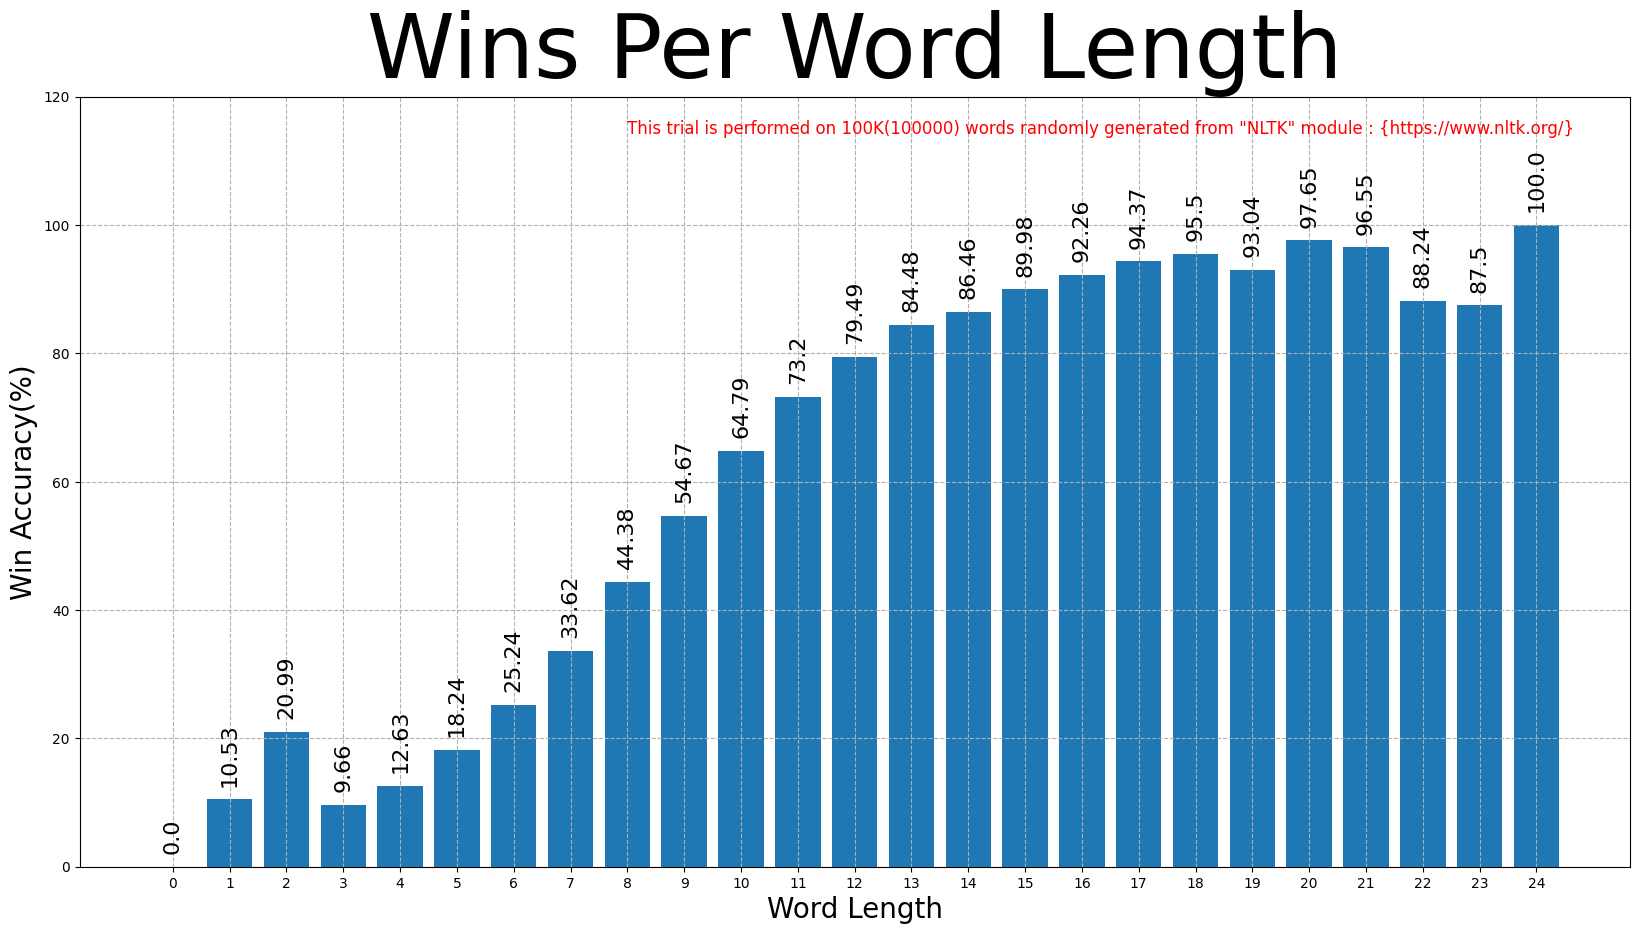

In [43]:
x_values = [x for x in range(25)]
# percent win per length
y_values = np.zeros(25)

#calculate accuracy per ith letter word
for i in range(25):
    if(words_of_length[i]!=0):
        y_values[i] = (wins_on_wordlength[i]/words_of_length[i])*100

#approximate values upto 2 decimal places
y_values = [round(value, 2) for value in y_values]
# y_values = [x  x = 0 if words_of_length(_)==0 else wins_on_wordlength[_]/words_of_length[_]]

plt.figure(figsize=(20, 10))
plt.bar(x_values,y_values, edgecolor='none')

# bar values 
for i, value in enumerate(y_values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', rotation=90,fontsize=16)

plt.grid(True, linestyle='--', alpha=1)

#format axis 
plt.ylim(0, 30)
plt.ylim(0, 120)
plt.xticks(x_values,x_values, rotation=0, ha='center')

# Define axes labels
plt.xlabel("Word Length" ,fontsize=20)
plt.ylabel("Win Accuracy(%)",fontsize=20)

#Title of graph
plt.title('Wins Per Word Length', fontsize=64, color='black')
plt.text(8, 115, 'This trial is performed on 100K(100000) words randomly generated from "NLTK" module : {https://www.nltk.org/}', ha='left', va='center', color='red',fontsize=12)

# Display a bar chart
plt.show()

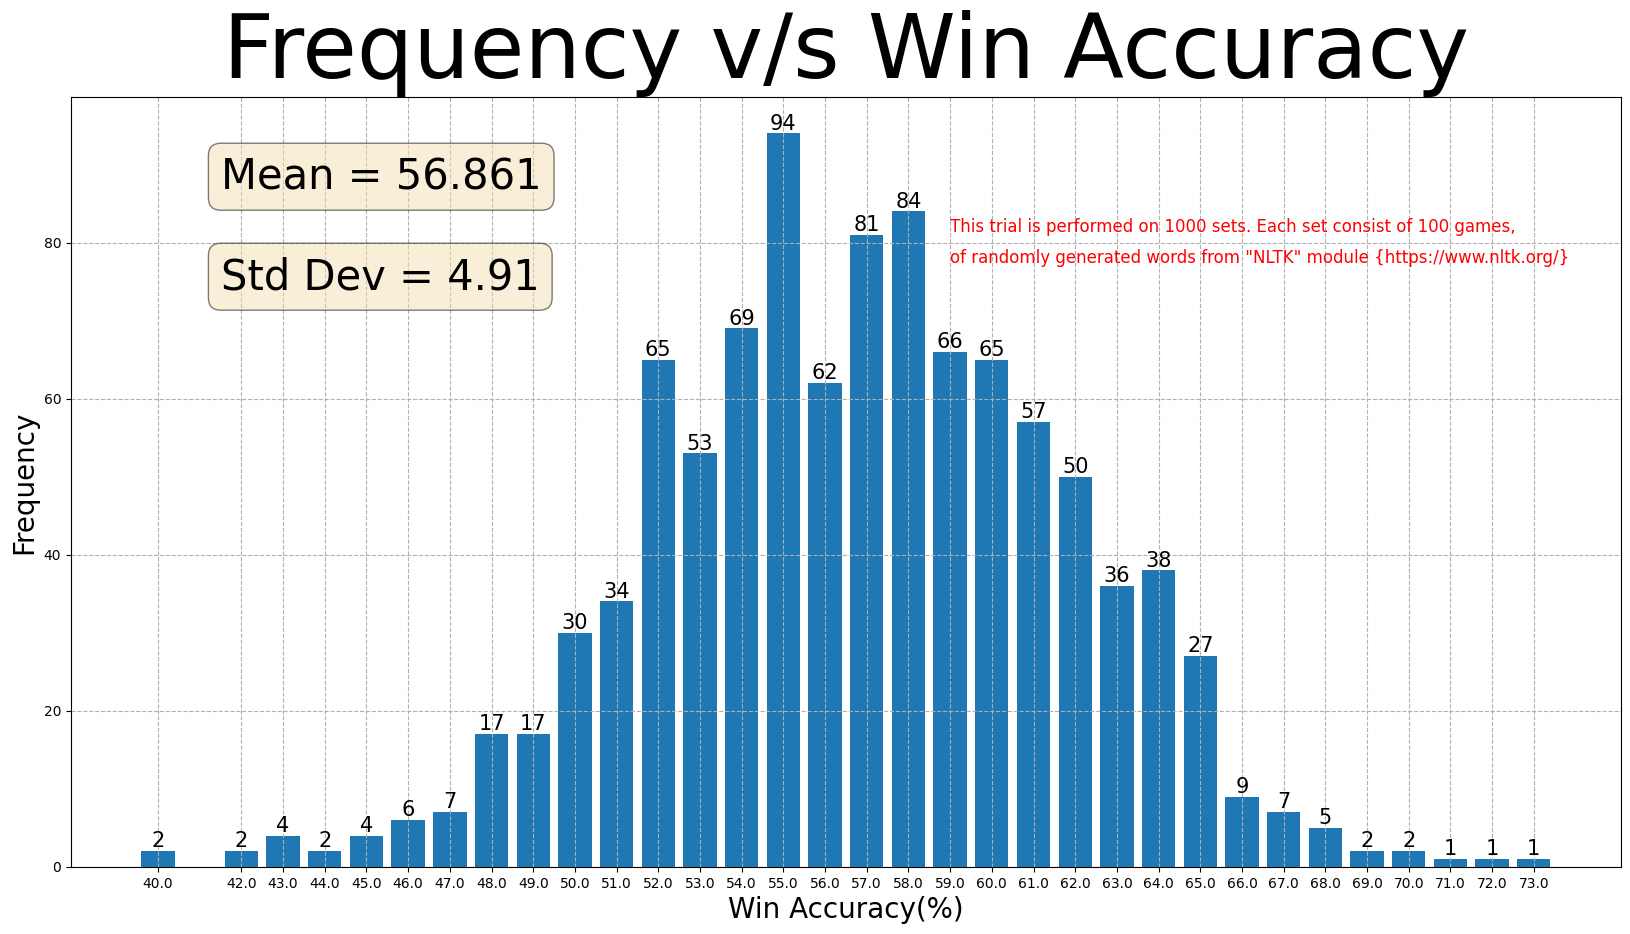

In [41]:

frequency_table = Counter(wins_for_1000_games) 

# Extract elements and counts for plotting
x_values= list(frequency_table.keys())
y_values = list(frequency_table.values())


plt.figure(figsize=(20, 10))
bars = plt.bar(x_values,y_values)


plt.grid(True, linestyle='--', alpha=1)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylim(0, 30)
# plt.ylim(0, 120)
plt.xticks(x_values,x_values, rotation=0, ha='center')

# Define axes labels
plt.xlabel("Win Accuracy(%)" ,fontsize=20)
plt.ylabel("Frequency",fontsize=20)

#Title of graph
plt.title('Frequency v/s Win Accuracy', fontsize=64, color='black')

#Text box
plt.text(59, 82, 'This trial is performed on 1000 sets. Each set consist of 100 games,', ha='left', va='center', color='red', fontsize = 12)
plt.text(58, 80, '', ha='left', va='center', color='red',fontsize=12)
plt.text(59, 78, 'of randomly generated words from "NLTK" module {https://www.nltk.org/}', ha='left', va='center', color='red',fontsize=12)

# Add a box with content
box_props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Adjust the position and size of the box
plt.text(0.2, 0.8, 'Mean = 56.861', transform=plt.gcf().transFigure,
         fontsize=30, verticalalignment='center', bbox=box_props)
plt.text(0.2, 0.7, 'Std Dev = 4.91', transform=plt.gcf().transFigure,
         fontsize=30, verticalalignment='center', bbox=box_props)

#print value of bar on top of it
tops_of_bars = [bar.get_height() for bar in bars]
# Add y-values on top of the bars
for bar, y_value in zip(bars, tops_of_bars):
    plt.text(bar.get_x() + bar.get_width() / 2, y_value, f'{y_value}', ha='center', va='bottom',fontsize=15)

# Display a bar chart
plt.show()

In [16]:
sum_counts = sum(count for element, count in frequency_table.items() if element < 50)
sum_counts/10

6.1